In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Data Loading 

In [50]:
ts1_train = pd.read_csv("./CMAPSSData/train_FD001.txt",sep=" ",header=None)
ts1_test = pd.read_csv("./CMAPSSData/test_FD001.txt",sep=" ",header=None)
ts1_test_RUL = pd.read_csv("./CMAPSSData/RUL_FD001.txt",sep=" ",header=None)

#ts1_train = pd.read_csv("./CMAPSSData/train_FD002.txt",sep=" ",header=None)
#ts1_test = pd.read_csv("./CMAPSSData/test_FD002.txt",sep=" ",header=None)
#ts1_test_RUL = pd.read_csv("./CMAPSSData/RUL_FD002.txt",sep=" ",header=None)

## Exploratory Data Analysis and Feature Engineering

In [51]:
ts1_train.head()
#ts1_test_RUL.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [52]:
## Drop NaN values
ts1_train.drop(columns = [26, 27], inplace = True)
ts1_test.drop(columns = [26, 27], inplace = True)

In [53]:
# Rename columns
# A total of 21 variables out of 58 different outputs available from the model were used in this study
#OS: Operational state (3)
#SM: Sensor Measurement (21)
columns = ['unit', 'time', 'os1', 'os2', 'os3', 'T2','T24','T30','T50','P2','P15','P30','Nf','Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [54]:
ts1_train.columns = columns
ts1_test.columns = columns

In [55]:
ts1_train.describe()

,unit,time,os1,os2,os3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [8]:
#remove the os and sensor measurements that don't change over time
#os3, T2, P2, farB, Nf_dmd, PCNfR_dmd, epr

In [9]:
ts1_train.drop(columns=['os3','T2', 'P2', 'farB', 'Nf_dmd','PCNfR_dmd','epr'],inplace=True)

In [10]:
ts1_train

,unit,time,os1,os2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [11]:
#Units: 1-100, time is no. of cycles before failure, different for each unit

In [12]:
#function for preparing training data and forming a RUL column with information about the remaining
# before breaking cycles
def add_RUL(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit')['time'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['unit','max']
    df = df.merge(fd_RUL, on=['unit'], how='left')
    df['RUL'] = df['max'] - df['time']
    df.drop(columns=['max'],inplace = True)
    
    return df[df['time'] > factor]

In [13]:
df= add_RUL(ts1_train)

In [14]:
df

,unit,time,os1,os2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [15]:
## Find corelation matrix of various features with RUL

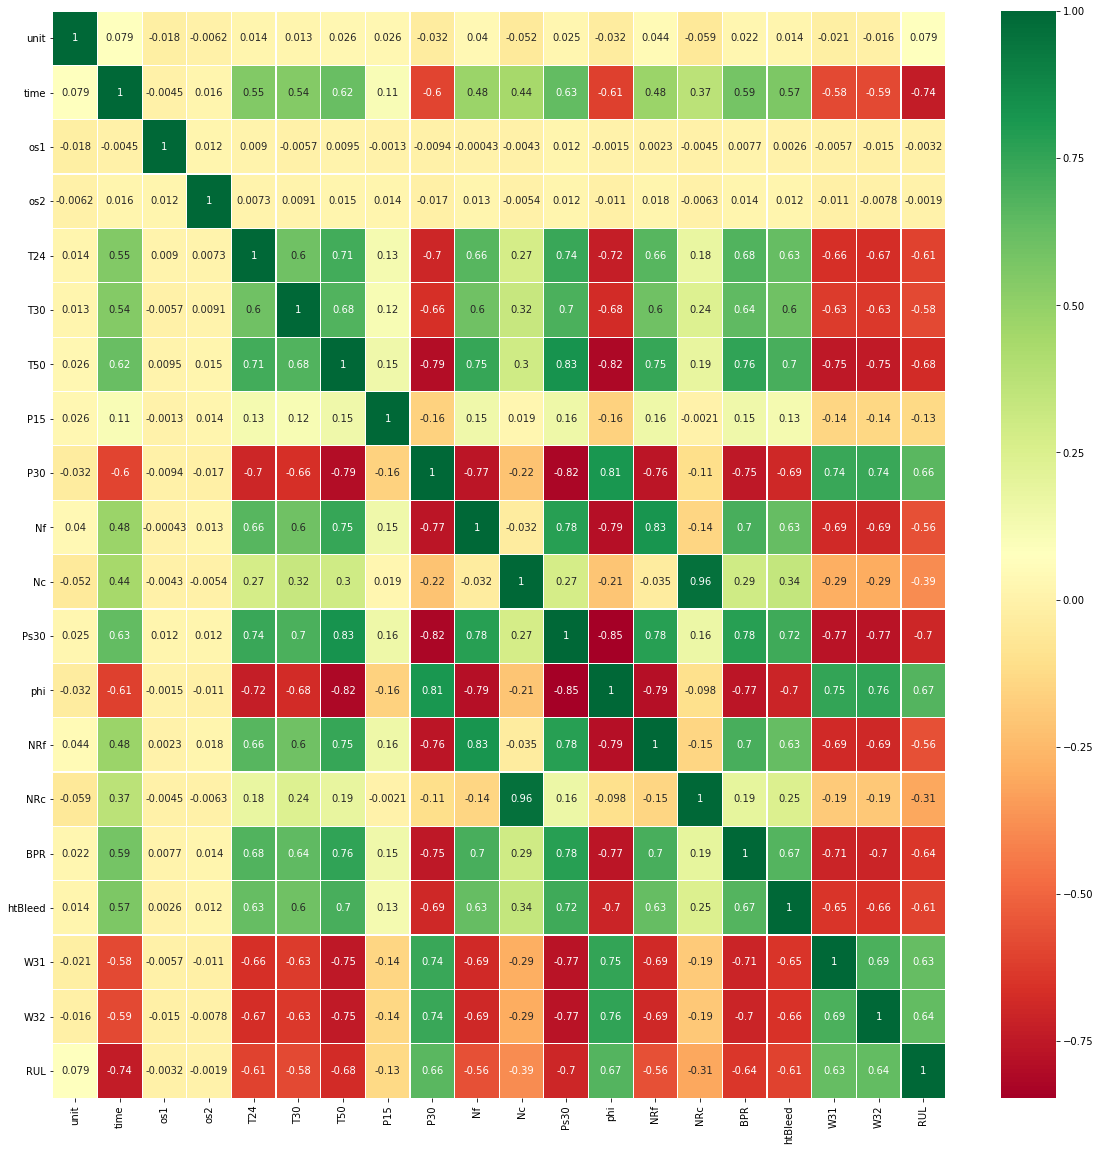

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [17]:
# remove features with low corr with RUL, and remove features that are co-related with each other (to prevent feature leaking)
# unit, os1, os2, P15 and  (Nc and NRc)

In [18]:
df_train = df.drop(columns = ['os1','os2','P15','NRc'])

In [19]:
df_train.head()

,unit,time,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,BPR,htBleed,W31,W32,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [20]:
import seaborn as sns

features = ['unit','time', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf',
       'BPR', 'htBleed', 'W31', 'W32', 'RUL']

df_selected = df[df["unit"]<10][features]

In [21]:
df_selected

,unit,time,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,BPR,htBleed,W31,W32,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,9,197,643.42,1596.70,1417.01,552.63,2388.15,9206.31,47.94,520.35,2388.09,8.5095,396,38.51,23.1810,4
1910,9,198,643.46,1599.45,1433.83,552.86,2388.15,9214.62,47.85,519.86,2388.13,8.5206,397,38.49,23.1286,3
1911,9,199,643.69,1603.70,1429.19,551.71,2388.09,9220.88,47.82,520.50,2388.10,8.5282,396,38.40,23.0677,2
1912,9,200,643.40,1602.89,1431.95,552.29,2388.44,9224.87,47.98,520.35,2388.44,8.4968,397,38.43,23.1008,1


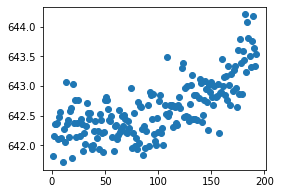

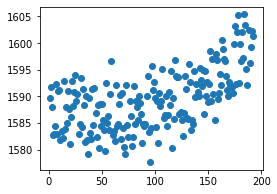

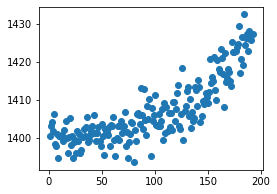

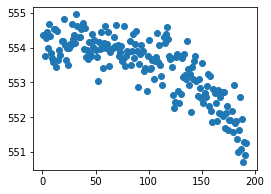

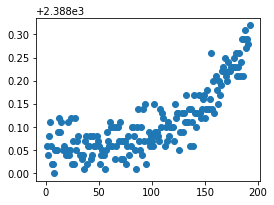

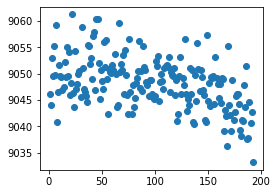

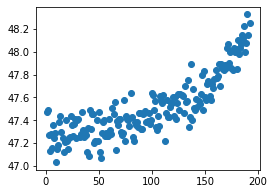

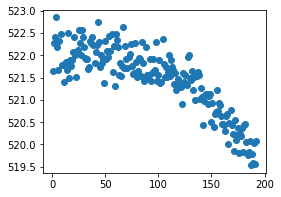

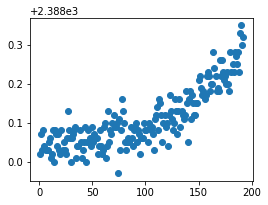

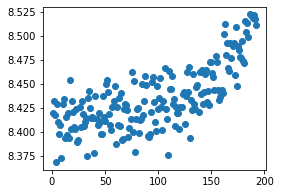

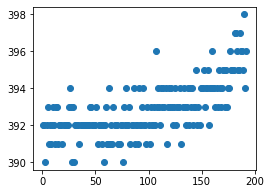

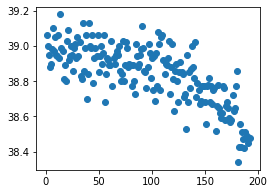

In [22]:
for i in range(2,14):
    x_df = df_selected.loc[df_selected['unit']==1]['time']
    y_df = df_selected.loc[df_selected['unit']==1].iloc[:,i]
    plt.figure(figsize = (4, 3))

    plt.scatter(x_df, y_df)
#    sns.relplot(x=x_df, y=y_df, ax= ax);
#    ax = plt.subplot(1,2,2)
#    sns.scatterplot(x="total_bill", y="tip", data=tips)


In [23]:
#sns.lineplot(data=df_selected["W31"])

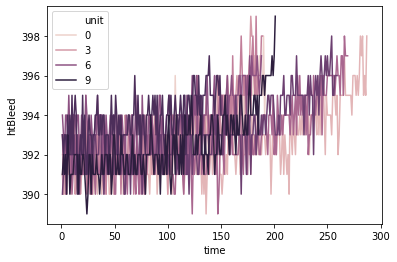

In [24]:
sns.lineplot(data=df_selected, x="time", y="htBleed", hue="unit")

In [25]:
df_test = add_RUL(ts1_test)

# actual RUL is RUL calculated above+ that provides in the RUL_FD001 file
for i in range(df_test.shape[0]):    
    df_test.loc[i,'RUL2'] = df_test.loc[i,'RUL'] + ts1_test_RUL.iloc[df_test.iloc[i,0]-1,0]
    
df_test

,unit,time,os1,os2,os3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL,RUL2
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,30,142.0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,29,141.0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,28,140.0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,27,139.0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,26,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,4,24.0
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,3,23.0
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2,22.0
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,1,21.0


In [26]:
df_test.drop(columns=['RUL'],inplace = True)
df_test = df_test.rename(columns={'RUL2': 'RUL'})

In [27]:
df_test = df_test[['unit','time', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf',
       'BPR', 'htBleed', 'W31', 'W32', 'RUL']]

In [28]:
df_test

,unit,time,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,BPR,htBleed,W31,W32,RUL
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,142.0
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,141.0
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,140.0
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,139.0
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,24.0
13092,100,195,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,23.0
13093,100,196,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,22.0
13094,100,197,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,21.0


## Normalize and pickle data

In [42]:
## Pickle non-normalized dataframes
df_train.to_pickle("./df_train_ts001.pkl")
df_test.to_pickle("./df_test_ts001.pkl")

In [29]:
columns=df_train.columns

In [30]:
#training data

gen_sc = MinMaxScaler(feature_range=(0, 1))
sc_df_train = gen_sc.fit_transform(df_train)

df_train_df=pd.DataFrame(sc_df_train, columns=columns)

df_train_df.to_pickle("./df_train_norm_ts001.pkl")

In [31]:
#normalize test data
sc_df_test = gen_sc.fit_transform(df_test)

df_test_df=pd.DataFrame(sc_df_test, columns=columns)

df_test_df.to_pickle("./df_test_norm_ts001.pkl")

# Calculate Moving Average

In [32]:
##calculate moving avg
def mov_avg(data, window):

    data_avg = pd.DataFrame()
    for ut in range(1, data["unit"].max() + 1):
        data_sub = data.loc[data["unit"]==ut]
        ravg = data_sub.rolling(window, min_periods=1).mean()
        data_avg = data_avg.append(ravg)
        data_avg['time']=data['time']
    return (data_avg)

In [33]:
#convert training data to moving avg
df_train_mov_avg3 = mov_avg(df_train,3)
df_train_mov_avg3.columns += "_mavg3"

df_train_mov_avg5 = mov_avg(df_train,5)
df_train_mov_avg5.columns += "_mavg5"

df_train_mov_avg10 = mov_avg(df_train,10)
df_train_mov_avg10.columns += "_mavg10"

In [34]:
#join the moving avg tables with the main table

df_train_join = pd.concat([df_train.iloc[:,0:15], df_train_mov_avg3.iloc[:,2:15], df_train_mov_avg5.iloc[:,2:15], df_train_mov_avg10.iloc[:,2:15], df_train.iloc[:,15]], axis=1, sort=False)

In [35]:
#convert test data to moving avg
df_test_mov_avg3 = mov_avg(df_test,3)
df_test_mov_avg3.columns += "_mavg3"

df_test_mov_avg5 = mov_avg(df_test,5)
df_test_mov_avg5.columns += "_mavg5"

df_test_mov_avg10 = mov_avg(df_test,10)
df_test_mov_avg10.columns += "_mavg10"

In [36]:
#join the moving avg tables with the main table

df_test_join = pd.concat([df_test.iloc[:,0:15], df_test_mov_avg3.iloc[:,2:15], df_test_mov_avg5.iloc[:,2:15], df_test_mov_avg10.iloc[:,2:15], df_test.iloc[:,15]], axis=1, sort=False)

## Normalize and pickle moving avg data

In [39]:
columns=df_train_join.columns

In [40]:
#normalize and pickle training data

gen_sc = MinMaxScaler(feature_range=(0, 1))
sc_df_train_join = gen_sc.fit_transform(df_train_join)

df_train_join_df=pd.DataFrame(sc_df_train_join, columns=columns)

df_train_join_df.to_pickle("./df_train_mvavg_norm_ts001.pkl")

In [41]:
#normalize and pickle test data
sc_df_test_join = gen_sc.fit_transform(df_test_join)

df_test_join_df=pd.DataFrame(sc_df_test_join, columns=columns)

df_test_join_df.to_pickle("./df_test_mvavg_norm_ts001.pkl")